#Samer Baslan
#CMPE-297: Deep Auto ViML: Image
#Fall 2021

Resource used: <br > https://github.com/AutoViML/deep_autoviml/blob/master/examples/Deep_Auto_ViML_Image_Classification_Demo.ipynb
<br >
Dataset used: <br > https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images

##Installs 
newer version 0.0.68 (released October 30th) of Deep AutoViML has a lot of bugs

In [1]:
!pip install deep_autoviml==0.0.67

     |████████████████████████████████| 269 kB 8.3 MB/s 
     |████████████████████████████████| 14.5 MB 60 kB/s 
     |████████████████████████████████| 308 kB 40.1 MB/s 
     |████████████████████████████████| 4.4 MB 36.5 MB/s 
     |████████████████████████████████| 23.2 MB 55.2 MB/s 
     |████████████████████████████████| 170 kB 54.9 MB/s 
     |████████████████████████████████| 209 kB 45.3 MB/s 
     |████████████████████████████████| 80 kB 10.5 MB/s 
     |████████████████████████████████| 75 kB 4.4 MB/s 
     |████████████████████████████████| 144 kB 50.7 MB/s 
     |████████████████████████████████| 111 kB 53.1 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=4cc68103e896198927f9c3b28ed3cfaa0a80fbd58a86f89e7a876d21596de672
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
  Created wheel for pyperclip: filename=pyperclip-1.8.

##Imports

In [14]:
from deep_autoviml import deep_autoviml as deepauto
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

##Load Data/Setup

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download tourist55/alzheimers-dataset-4-class-of-images
!unzip alzheimers-dataset-4-class-of-images
!mv Alzheimer_s\ Dataset AlzheimersDataset

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/m

##Visualize training classes

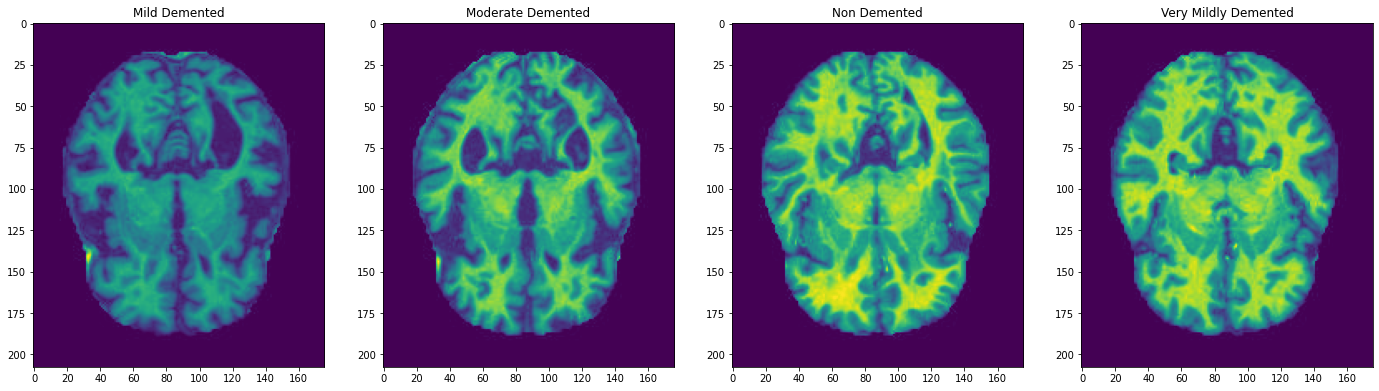

In [16]:
f, axarr = plt.subplots(1,4, figsize=(24,9)) 
sample = '0.jpg'
trainpath = '/content/AlzheimersDataset/train'
axarr[0].imshow(Image.open(trainpath+'/MildDemented/mildDem'+sample))
axarr[0].set(title = "Mild Demented")

axarr[1].imshow(Image.open(trainpath+'/ModerateDemented/moderateDem'+sample))
axarr[1].set(title = "Moderate Demented")

axarr[2].imshow(Image.open(trainpath+'/NonDemented/nonDem'+sample))
axarr[2].set(title = "Non Demented")

axarr[3].imshow(Image.open(trainpath+'/VeryMildDemented/verymildDem'+sample))
axarr[3].set(title = "Very Mildly Demented")

plt.show()

##Hyperparameters

In [5]:
project_name = "Alzheimers"
image_dir = '/content/AlzheimersDataset/'
target = 'image'
img_height = 224
img_width = 224
img_channels = 3 
keras_model_type =  "image" ## always try "auto" first, then "basic", "deep", "big deep", "giant deep", "cnn1" etc.

keras_options = {
    "early_stopping": True, 
    'lr_scheduler': 'rlr', 
    "epochs": 3
    } 

model_options = {'tuner':"optuna", 
                 "max_trials":2, 
                 'cat_feat_cross_flag':True, 
                 'image_directory': image_dir, 
                 'image_height': img_height, 
                 'image_width':img_width, 
                 'image_channels':img_channels
                 }

##Train

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
    Image directory given as /content/AlzheimersDataset/
For image use case:
    Image height given as 224
    Image width given as 224
    Image channels given as 3
No validation folder found under given image directory /content/AlzheimersDataset/. Returning...
Found 5121 files belonging to 4 classes.

Splitting train into two: train and validation data
Number of image classes = 4 and they are: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
Training image model. This will take time...
Epoch 1/3
40/40 [==============================] - 34s 308ms/step - loss: 1.2521 - accuracy: 0.4520 - val_loss: 0.9843 - val_accuracy: 0.5551
Epoch 2/3
40/40 [==============================] - 3s 70ms/step - loss: 1.0473 - accuracy: 0.5203 - val_loss: 0.8970 - val_accuracy: 0.5776
Epoch 3/3
17/17 [=========================

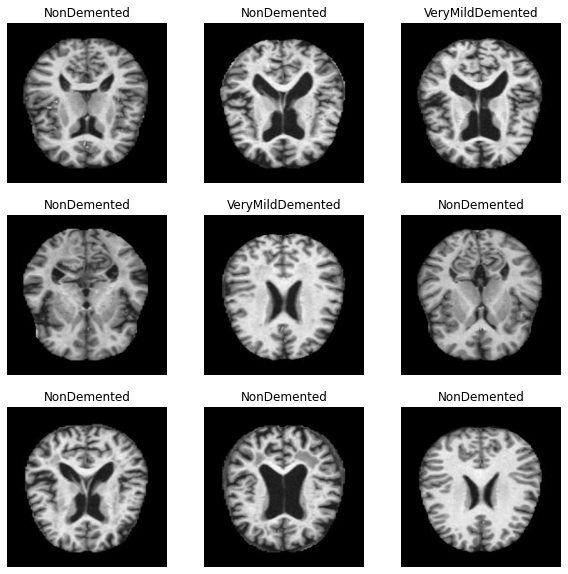

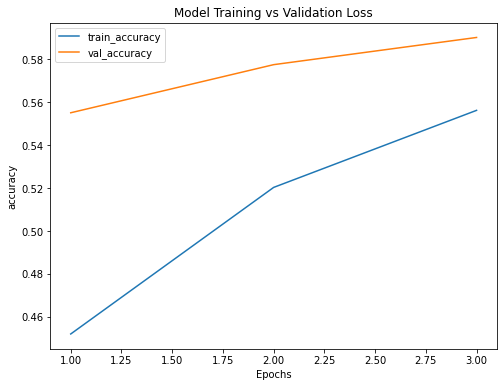

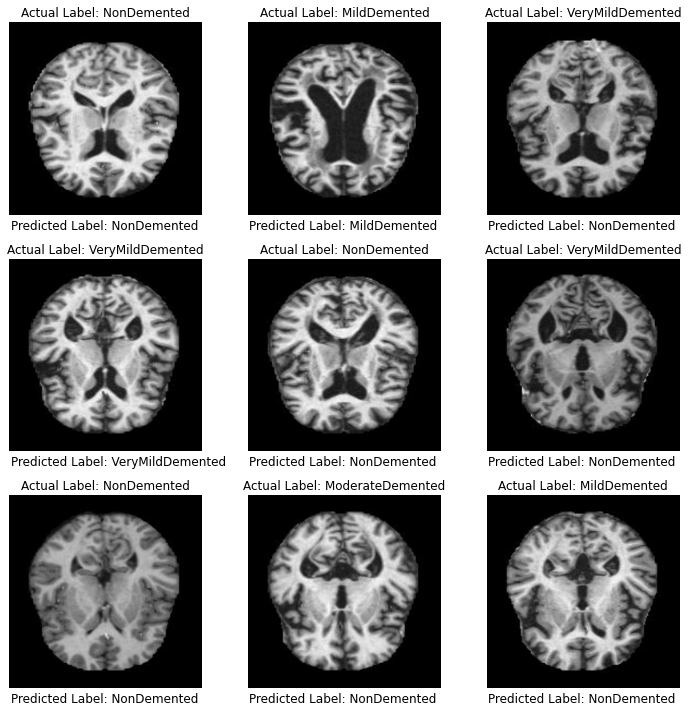

In [6]:
model, dicti = deepauto.fit("", 
                            target, 
                            keras_model_type=keras_model_type, 
                            project_name=project_name, 
                            save_model_flag=False, 
                            model_options=model_options,
                            keras_options=keras_options, 
                            use_my_model='', 
                            verbose=2
                            )

##Results

In [7]:
test_image_dir = image_dir + '/test'
predictions = deepauto.predict_images(
    test_image_dir, model, dicti, keras_model_type
    )


Loading deep_autoviml model from <keras.engine.sequential.Sequential object at 0x7f89988bca90> folder. This will take time...

Using <keras.engine.sequential.Sequential object at 0x7f89988bca90> model provided as input...
Time taken to load saved model = 0 seconds
    loading and predicting on folder: /content/AlzheimersDataset//test
Found 1279 files belonging to 4 classes.
    Sample predictions before inverse_transform: [2 2 2 2 2]
    Sample predictions after inverse_transform: ['NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented']


In [11]:
test = tf.keras.preprocessing.image_dataset_from_directory(
  test_image_dir,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=128
  )

Found 1279 files belonging to 4 classes.


In [12]:
model.evaluate(test)

10/10 [==============================] - 3s 120ms/step - loss: 1.0106 - accuracy: 0.5160


[1.0105823278427124, 0.5160281658172607]